In [16]:
import tensorflow as tf


In [25]:
import numpy as np
import pandas as pd
import PIL
import os
import PIL.Image

In [26]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 22s 0us/step


In [27]:
image_count = len(list(data_dir.glob("*/*.jpg")))

In [30]:
roses = list(data_dir.glob("roses/*"))

In [31]:
roses

[WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('C:/Users/yw347/.keras/datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('C:/Users/yw347/.keras/data

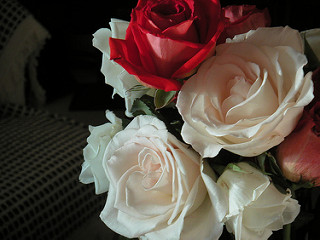

In [33]:
PIL.Image.open(roses[1])

In [34]:
batch_size = 32
image_width = 180
image_height = 180

In [36]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,image_size=(image_width,image_height),validation_split=0.2,subset="training",seed=123)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [37]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir,image_size=(image_width,image_height),seed=123,subset="validation",validation_split=0.2)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [52]:
class_names = train_ds.class_names

In [39]:
import matplotlib.pyplot as plt

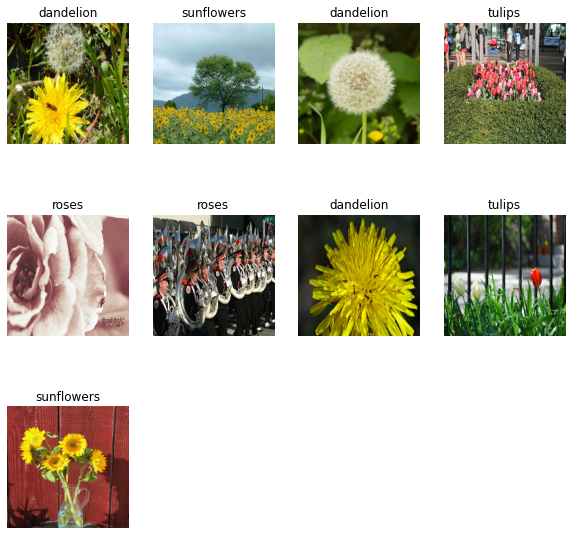

In [59]:
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [67]:
next(iter(train_ds.take(1)))

(<tf.Tensor: shape=(32, 180, 180, 3), dtype=float32, numpy=
 array([[[[1.26000000e+02, 1.18666664e+02, 1.36833328e+02],
          [1.18500000e+02, 1.17500000e+02, 1.25166664e+02],
          [1.03333336e+02, 1.13333336e+02, 1.05333336e+02],
          ...,
          [7.35000000e+01, 1.06000000e+02, 6.65000000e+01],
          [6.83333359e+01, 1.06333336e+02, 6.53333359e+01],
          [6.60000000e+01, 1.09000000e+02, 6.60000000e+01]],
 
         [[1.25000000e+02, 1.16000000e+02, 1.34000000e+02],
          [1.14500000e+02, 1.12500000e+02, 1.19000000e+02],
          [9.85000000e+01, 1.07000000e+02, 9.90000000e+01],
          ...,
          [7.75000000e+01, 1.13500000e+02, 7.10000000e+01],
          [6.95000000e+01, 1.09000000e+02, 6.65000000e+01],
          [6.60000000e+01, 1.09000000e+02, 6.50000000e+01]],
 
         [[1.21500000e+02, 1.10833336e+02, 1.27000000e+02],
          [1.08833336e+02, 1.06666664e+02, 1.12000000e+02],
          [9.45000000e+01, 1.02333336e+02, 9.18333359e+01],
    

In [60]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1/255.0)

In [61]:
AUTOTUNE = tf.data.AUTOTUNE

In [64]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [65]:
num_classes = 5

In [80]:
inputs = tf.keras.Input(shape=(180,180,3))
rescale = normalization_layer(inputs)
x = tf.keras.layers.Conv2D(32,3,activation="relu")(rescale)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32,3,activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(32,3,activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)
outputs = tf.keras.layers.Dense(5)(x)
model = tf.keras.Model(inputs,outputs)

In [81]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [82]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 87, 87, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 41, 41, 32)        9248

In [84]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 [==============================] - 13s 142ms/step - loss: 0.7025 - accuracy: 0.7388 - val_loss: 0.8769 - val_accuracy: 0.6594
Epoch 2/3
92/92 [==============================] - 13s 139ms/step - loss: 0.5168 - accuracy: 0.8181 - val_loss: 0.9765 - val_accuracy: 0.6580
Epoch 3/3
92/92 [==============================] - 13s 147ms/step - loss: 0.3678 - accuracy: 0.8692 - val_loss: 1.1534 - val_accuracy: 0.6499
